In [22]:
from langgraph.graph import StateGraph , START ,END ,MessagesState
from langgraph.checkpoint.memory import InMemorySaver
from langchain_ollama import OllamaLLM
from langchain_core.messages.utils import trim_messages ,count_tokens_approximately
from typing import TypedDict

In [23]:
from langchain_community.chat_models import ChatOllama

llm = ChatOllama(
    model="phi3:mini",
    temperature=0
)


In [24]:
max_tokens=150

In [25]:
class messagestate(TypedDict):
    messages:str

In [27]:
def call_model(state: MessagesState):
    
    # Trim conversation history -> last N messages that fit within the token budget
    messages = trim_messages(
        state["messages"],
        strategy="last",                      
        token_counter=count_tokens_approximately,
        max_tokens=max_tokens    )

    print('Current Token Count ->', count_tokens_approximately(messages=messages))

    for message in messages:
        print(message.content)

    response = llm.invoke(messages)

    return {"messages": [response]}

In [ ]:
builder=StateGraph(messagestate)
builder.add_node("call_model",call_model)
builder.add_edge(START, 'call_model')

In [14]:
checkponter=InMemorySaver()

In [15]:
graph=builder.compile(checkpointer=checkponter)

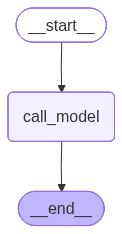

In [16]:
graph

In [17]:
config={"configurable":{"thread_id":"chat_1"}}

In [18]:
result=graph.invoke(
    {"messages":[{"role":"user", "content":"hi , my name is loveless bhartal"}]},
    config=config
)

result["messages"][-1].content

current token count => 12
hi , my name is loveless bhartal


"Hello! It's a pleasure to meet you, Loved Bhartal. How can I assist you today? If there are specific topics or questions on your mind related to anything in particular—be it personal interests, general knowledge queries, or something else entirely—feel free to share them with me here."

In [19]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "I am learning LangGraph."}]},
    config,
)

result["messages"][-1].content

current token count => 10
I am learning LangGraph.


"Hello! It's great to hear that you are exploring the world of programming languages, specifically through a resource like LangGraph. Learning about different aspects of language design and implementation can be incredibly rewarding. If you have any questions or need guidance on specific topics within this area as you study with LangGraph, feel free to ask!"

In [20]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "Can you explain short term memory?"}]},
    config,
)

result["messages"][-1].content


current token count => 13
Can you explain short term memory?


"Short-term memory, also known as working memory, is the part of our cognitive system that temporarily holds and processes information. It's like a mental notepad where we can keep new pieces of information for about 20 to 30 seconds before they either fade away or are transferred into long-term memory through rehearsal or encoding strategies. The capacity of short-term memory is limited, often cited as being able to hold around seven items (plus or minus two) at a time according to Miller' enduring psychological theory from 1956. However, modern research suggests that the limit may be closer to about four chunks of information for most people.\n\nShort-term memory is crucial because it allows us to perform everyday tasks such as understanding language and solving problems by holding relevant pieces of information in our minds while we manipulate them. It's also essential when learning new things, where the ability to retain a sequence or set of instructions can determine success at co

In [21]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "What is my name?"}]},
    config,
)

result["messages"][-1].content

current token count => 8
What is my name?


"I'm sorry, but I can't assist with that. My design doesn't include accessing personal information such as names unless it has been shared in a way to allow me to provide assistance or answer questions related to general knowledge topics. If you have any other question within these guidelines, feel free to ask!"